<a href="https://colab.research.google.com/github/morbosohex/Workflow/blob/master/intro_to_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-lab: exerices


In [0]:
import tensorflow as tf

In [0]:
hello_constant = tf.constant('hello world!')

In [0]:
with tf.Session() as sess:
    output = sess.run(hello_constant)
    print(output)

b'hello world!'


In [0]:
x = tf.Variable(5)
init = tf.global_variables_initializer()
with tf.Session as sess:
    sess.run(init)

In [0]:
n_features = 120
n_labels = 5

weights = tf.Variable(tf.truncated_normal((n_features, n_labels)))
bias = tf.Variable(tf.zeros(n_labels))


# Quiz - train weights using the MNIST dataset

In [0]:
import tensorflow as tf
def get_weights(n_features, n_labels):
    """
    Return TensroFlow weights
    :param n_features: Number of features
    :param n_labels: Number of labels
    :return: TensorFlow weights
    """
    
    # TODO: Return weights
    return tf.Variable(tf.truncated_normal((n_features,n_labels)))

In [0]:
def get_biases(n_labels):
    """
    Return TensorFlow bias
    :param n_labels: Number of labels
    :return: TensorFlow bias
    """
    # TODO: Return biases
    return tf.Variable(tf.zeros(n_labels))

In [0]:
jdef linear(input, w, b):
    """
    Return linear function in TensorFlow
    :param input: TensorFlow input
    :param w: TensorFlow weights
    :param b: TensorFlow biases
    :return: TensorFlow linear function
    """
    # TODO: Linear Function (xW + b)
    return tf.add(tf.matmul(input, w), b)
    

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

def mnist_features_labels(n_labels):
    """
    Gets the first <n> labels from the MNIST dataset
    :param n_labels: Number of labels to use
    :return: Tuple of feature list and label list
    """
    mnist_features = []
    mnist_labels = []

    mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

    # In order to make quizzes run faster, we're only looking at 10000 images
    for mnist_feature, mnist_label in zip(*mnist.train.next_batch(10000)):

        # Add features and labels if it's for the first <n>th labels
        if mnist_label[:n_labels].any():
            mnist_features.append(mnist_feature)
            mnist_labels.append(mnist_label[:n_labels])

    return mnist_features, mnist_labels

# Number of features (28*28 image is 784 features)
n_features = 784
# Number of labels
n_labels = 3

features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

# Weights and Biases
w = get_weights(n_features, n_labels)
b = get_biases(n_labels)

# Linear Function xW + b
logits = linear(features, w, b)

# Training data
train_features, train_labels = mnist_features_labels(n_labels)



Extracting /datasets/ud730/mnist/train-images-idx3-ubyte.gz
Extracting /datasets/ud730/mnist/train-labels-idx1-ubyte.gz
Extracting /datasets/ud730/mnist/t10k-images-idx3-ubyte.gz
Extracting /datasets/ud730/mnist/t10k-labels-idx1-ubyte.gz


In [0]:
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    
    # Softmax
    prediction = tf.nn.softmax(logits)
    
    # Cross entropy
    # This quantifies how far off the predictions were.
    cross_entropy = -tf.reduce_sum(labels * tf.log(prediction),reduction_indices = 1)
    
    # Training loss
    loss = tf.reduce_mean(cross_entropy)
    
    # Rate at which the weights are changed
    learning_rate = 0.08
    
    # Gradient Descent
    # This is the method used to train the model
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    # Run optimizer and get loss
    a, l = session.run(
    [optimizer, loss],
    feed_dict={features: train_features, labels: train_labels})
    
# print loss
print('Loss: {}'.format(l))

Loss: 8.547343254089355


# Quiz - Tensorflow softmax

In [0]:
def run():
    output = None
    logit_data = [2.0, 1.0, 0.1]
    logits = tf.placeholder(tf.float32)
    softmax = tf.nn.softmax(logits)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        output = sess.run(softmax, feed_dict={logits: logit_data})
    return output

# Quiz - Cross Entropy

In [0]:
softmax_data = [0.7,0.2,0.1]
one_hot_data = [1.0,0.0,0.0]

softmax = tf.placeholder(tf.float32)
one_hot = tf.placeholder(tf.float32)

cross_entropy = -tf.reduce_sum(tf.multiply(one_hot, tf.log(softmax)))

with tf.Session() as sess:
    output = sess.run(cross_entropy, feed_dict={one_hot: one_hot_data,
                                           softmax: softmax_data})
    print(output)

0.35667497


# Quiz - Mini-batch

- first divide your data into batches. 但是并不是所有情况都能够等分数据集, 例如1000个数据点, 分成128份, 不能等分, 此时就需要`tf.placeholder()`, 其可以接受可变化的批次大小

Continuing the example, if each sample had n_input = 784 features and n_classes = 10 possible labels, the dimensions for features would be [None, n_input] and labels would be [None, n_classes].

```
# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])


```

What does None do here?

The None dimension is a placeholder for the batch size. At runtime, TensorFlow will accept any batch size greater than 0.

In [0]:
import math
from pprint import pprint
def batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    sample_size = len(features)
    output_batches = []
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i: end_i]]
        output_batches.append(batch)
    return output_batches    
           
    


# 4 Samples of features
example_features = [
    ['F11','F12','F13','F14'],
    ['F21','F22','F23','F24'],
    ['F31','F32','F33','F34'],
    ['F41','F42','F43','F44']]
# 4 Samples of labels
example_labels = [
    ['L11','L12'],
    ['L21','L22'],
    ['L31','L32'],
    ['L41','L42']]

# PPrint prints data structures like 2d arrays, so they are easier to read
pprint(batches(3, example_features, example_labels))

[[[['F11', 'F12', 'F13', 'F14'],
   ['F21', 'F22', 'F23', 'F24'],
   ['F31', 'F32', 'F33', 'F34']],
  [['L11', 'L12'], ['L21', 'L22'], ['L31', 'L32']]],
 [[['F41', 'F42', 'F43', 'F44']], [['L41', 'L42']]]]


In [0]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np

learning_rate = 0.001
n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)


# Import MNIST data
mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
test_features = mnist.test.images

train_labels = mnist.train.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)\

 # Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None,n_classes])

# Weights and bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits - xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

batch_size = 128
assert batch_size is not None, 'You must set the batch size'

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for batch_features, batch_labels in batches(batch_size, train_features, train_labels):
        sess.run(optimizer, feed_dict={features:batch_features, 
                                        labels:batch_labels})
        
    test_accuracy = sess.run(
    accuracy,
    feed_dict={features: test_features, labels: test_labels})
print('Test Accuracy: {}'.format(test_accuracy))
        

Extracting /datasets/ud730/mnist/train-images-idx3-ubyte.gz
Extracting /datasets/ud730/mnist/train-labels-idx1-ubyte.gz
Extracting /datasets/ud730/mnist/t10k-images-idx3-ubyte.gz
Extracting /datasets/ud730/mnist/t10k-labels-idx1-ubyte.gz
Test Accuracy: 0.10890000313520432


# Quiz - Epochs

used to increase the accuracy of the model without requiring more data.

In [0]:
def print_epoch_stats(epoch_i, sess, last_features, last_labels):
    """
    Print cost and validation accuracy of an epoch
    """
    current_cost = sess.run(
        cost,
        feed_dict={features:last_features, labels:last_labels})
    valid_accuracy = sess.run(
        accuracy,
        feed_dict={features:last_features, labels:last_labels})
    print('Epoch: {:<4} - Cost: {:<8.3} Valid Accuracy: {:<5.3}'.format(
        epoch_i,
        current_cost,
        valid_accuracy))
    
n_input = 784
n_classes = 10

# Import MNIST data
mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
valid_features = mnist.validation.images
test_features = mnist.test.images

train_labels = mnist.train.labels.astype(np.float32)
valid_labels = mnist.validation.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)

# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])


# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits - xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
learning_rate = tf.placeholder(tf.float32)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)


# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()

batch_size = 128
epochs = 100
learn_rate = 0.01

train_batches = batches(batch_size, train_features, train_labels)

with tf.Session() as sess:
    sess.run(init)
    
    # Training cycle
    for epoch_i in range(epochs):
        for batch_features, batch_labels in train_batches:
            train_feed_dict = {
                features: batch_features,
                labels: batch_labels,
                learning_rate: learn_rate
            }
            sess.run(optimizer, feed_dict=train_feed_dict)
        # Print cost and validation accuracy of an epoch
        print_epoch_stats(epoch_i, sess, batch_features, batch_labels)
    # Calculate accuracy for test dataset
    test_accuracy = sess.run(
        accuracy,
        feed_dict={features:test_features, labels:test_labels})
print('Test Accuracy: {}'.format(test_accuracy))  

Extracting /datasets/ud730/mnist/train-images-idx3-ubyte.gz
Extracting /datasets/ud730/mnist/train-labels-idx1-ubyte.gz
Extracting /datasets/ud730/mnist/t10k-images-idx3-ubyte.gz
Extracting /datasets/ud730/mnist/t10k-labels-idx1-ubyte.gz
Epoch: 0    - Cost: 7.76     Valid Accuracy: 0.136
Epoch: 1    - Cost: 5.21     Valid Accuracy: 0.284
Epoch: 2    - Cost: 3.87     Valid Accuracy: 0.341
Epoch: 3    - Cost: 3.09     Valid Accuracy: 0.409
Epoch: 4    - Cost: 2.62     Valid Accuracy: 0.5  
Epoch: 5    - Cost: 2.28     Valid Accuracy: 0.523
Epoch: 6    - Cost: 2.03     Valid Accuracy: 0.58 
Epoch: 7    - Cost: 1.84     Valid Accuracy: 0.614
Epoch: 8    - Cost: 1.68     Valid Accuracy: 0.636
Epoch: 9    - Cost: 1.56     Valid Accuracy: 0.648
Epoch: 10   - Cost: 1.45     Valid Accuracy: 0.659
Epoch: 11   - Cost: 1.36     Valid Accuracy: 0.67 
Epoch: 12   - Cost: 1.29     Valid Accuracy: 0.682
Epoch: 13   - Cost: 1.22     Valid Accuracy: 0.693
Epoch: 14   - Cost: 1.17     Valid Accuracy: 0.7

<h1 align="center">TensorFlow Neural Network Lab</h1>

<img src="image/notmnist.png">
In this lab, you'll use all the tools you learned from *Introduction to TensorFlow* to label images of English letters! The data you are using, <a href="http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html">notMNIST</a>, consists of images of a letter from A to J in different fonts.

The above images are a few examples of the data you'll be training on. After training the network, you will compare your prediction model against test data. Your goal, by the end of this lab, is to make predictions against that test set with at least an 80% accuracy. Let's jump in!

To start this lab, you first need to import all the necessary modules. Run the code below. If it runs successfully, it will print "`All modules imported`".

In [0]:
import hashlib
import os
import pickle
from urllib.request import urlretrieve

import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
from tqdm import tqdm
from zipfile import ZipFile

print('All modules imported.')

All modules imported.


The notMNIST dataset is too large for many computers to handle.  It contains 500,000 images for just training.  You'll be using a subset of this data, 15,000 images for each label (A-J).

In [0]:
def download(url, file):
    """
    Download file from <url>
    :param url: URL to file
    :param file: Local file path
    """
    if not os.path.isfile(file):
        print('Downloading ' + file + '...')
        urlretrieve(url, file)
        print('Download Finished')

# Download the training and test dataset.
download('https://s3.amazonaws.com/udacity-sdc/notMNIST_train.zip', 'notMNIST_train.zip')
download('https://s3.amazonaws.com/udacity-sdc/notMNIST_test.zip', 'notMNIST_test.zip')

# Make sure the files aren't corrupted
assert hashlib.md5(open('notMNIST_train.zip', 'rb').read()).hexdigest() == 'c8673b3f28f489e9cdf3a3d74e2ac8fa',\
        'notMNIST_train.zip file is corrupted.  Remove the file and try again.'
assert hashlib.md5(open('notMNIST_test.zip', 'rb').read()).hexdigest() == '5d3c7e653e63471c88df796156a9dfa9',\
        'notMNIST_test.zip file is corrupted.  Remove the file and try again.'

# Wait until you see that all files have been downloaded.
print('All files downloaded.')

All files downloaded.


In [0]:
def uncompress_features_labels(file):
    """
    Uncompress features and labels from a zip file
    :param file: The zip file to extract the data from
    """
    features = []
    labels = []

    with ZipFile(file) as zipf:
        # Progress Bar
        filenames_pbar = tqdm(zipf.namelist(), unit='files')
        
        # Get features and labels from all files
        for filename in filenames_pbar:
            # Check if the file is a directory
            if not filename.endswith('/'):
                with zipf.open(filename) as image_file:
                    image = Image.open(image_file)
                    image.load()
                    # Load image data as 1 dimensional array
                    # We're using float32 to save on memory space
                    feature = np.array(image, dtype=np.float32).flatten()

                # Get the the letter from the filename.  This is the letter of the image.
                label = os.path.split(filename)[1][0]

                features.append(feature)
                labels.append(label)
    return np.array(features), np.array(labels)

# Get the features and labels from the zip files
train_features, train_labels = uncompress_features_labels('notMNIST_train.zip')
test_features, test_labels = uncompress_features_labels('notMNIST_test.zip')

# Limit the amount of data to work with a docker container
docker_size_limit = 150000
train_features, train_labels = resample(train_features, train_labels, n_samples=docker_size_limit)

# Set flags for feature engineering.  This will prevent you from skipping an important step.
is_features_normal = False
is_labels_encod = False

# Wait until you see that all features and labels have been uncompressed.
print('All features and labels uncompressed.')

100%|██████████| 10001/10001 [00:01<00:00, 7687.84files/s]


All features and labels uncompressed.



## Problem 1
第一个问题涉及标准化训练和测试数据。


Implement Min-Max scaling in the `normalize_grayscale()` function to a range of `a=0.1` and `b=0.9`. After scaling, the values of the pixels in the input data should range from 0.1 to 0.9.

Since the raw notMNIST image data is in [grayscale](https://en.wikipedia.org/wiki/Grayscale), the current values range from a min of 0 to a max of 255.

Min-Max Scaling:
$
X'=a+{\frac {\left(X-X_{\min }\right)\left(b-a\right)}{X_{\max }-X_{\min }}}
$

*If you're having trouble solving problem 1, you can view the solution [here](https://github.com/udacity/deep-learning/blob/master/intro-to-tensorflow/intro_to_tensorflow_solution.ipynb).*

In [0]:
np.max([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 255])

255

In [0]:
# Problem 1 - Implement Min-Max scaling for grayscale image data
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    
    # TODO: Implement Min-Max scaling for grayscale image data
    x_max = 255
    x_min = 0
    a = 0.1
    b = 0.9
    return (image_data-x_min)*(b-a)/(x_max-x_min) + a

### DON'T MODIFY ANYTHING BELOW ###
# Test Cases
np.testing.assert_array_almost_equal(
    normalize_grayscale(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 255])),
    [0.1, 0.103137254902, 0.106274509804, 0.109411764706, 0.112549019608, 0.11568627451, 0.118823529412, 0.121960784314,
     0.125098039216, 0.128235294118, 0.13137254902, 0.9],
    decimal=3)
np.testing.assert_array_almost_equal(
    normalize_grayscale(np.array([0, 1, 10, 20, 30, 40, 233, 244, 254,255])),
    [0.1, 0.103137254902, 0.13137254902, 0.162745098039, 0.194117647059, 0.225490196078, 0.830980392157, 0.865490196078,
     0.896862745098, 0.9])

if not is_features_normal:
    train_features = normalize_grayscale(train_features)
    test_features = normalize_grayscale(test_features)
    is_features_normal = True

print('Tests Passed!')

Tests Passed!


In [0]:
if not is_labels_encod:
    # Turn labels into numbers and apply One-Hot Encoding
    encoder = LabelBinarizer()
    encoder.fit(train_labels)
    train_labels = encoder.transform(train_labels)
    test_labels = encoder.transform(test_labels)

    # Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
    train_labels = train_labels.astype(np.float32)
    test_labels = test_labels.astype(np.float32)
    is_labels_encod = True

print('Labels One-Hot Encoded')

Labels One-Hot Encoded


In [0]:
assert is_features_normal, 'You skipped the step to normalize the features'
assert is_labels_encod, 'You skipped the step to One-Hot Encode the labels'

# Get randomized datasets for training and validation
train_features, valid_features, train_labels, valid_labels = train_test_split(
    train_features,
    train_labels,
    test_size=0.05,
    random_state=832289)

print('Training features and labels randomized and split.')

Training features and labels randomized and split.


In [0]:
# Save the data for easy access
pickle_file = 'notMNIST.pickle'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open('notMNIST.pickle', 'wb') as pfile:
            pickle.dump(
                {
                    'train_dataset': train_features,
                    'train_labels': train_labels,
                    'valid_dataset': valid_features,
                    'valid_labels': valid_labels,
                    'test_dataset': test_features,
                    'test_labels': test_labels,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

Saving data to pickle file...
Data cached in pickle file.


# Checkpoint
All your progress is now saved to the pickle file.  If you need to leave and comeback to this lab, you no longer have to start from the beginning.  Just run the code block below and it will load all the data and modules required to proceed.

In [0]:
%matplotlib inline

# Load the modules
import pickle
import math

import numpy as np
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

# Reload the data
pickle_file = 'notMNIST.pickle'
with open(pickle_file, 'rb') as f:
    pickle_data = pickle.load(f)
    train_features = pickle_data['train_dataset']
    train_labels = pickle_data['train_labels']
    valid_features = pickle_data['valid_dataset']
    valid_labels = pickle_data['valid_labels']
    test_features = pickle_data['test_dataset']
    test_labels = pickle_data['test_labels']
    del pickle_data  # Free up memory

print('Data and modules loaded.')

Data and modules loaded.



## Problem 2

Now it's time to build a simple neural network using TensorFlow. Here, your network will be just an input layer and an output layer.



For the input here the images have been flattened into a vector of $28 \times 28 = 784$ features. Then, we're trying to predict the image digit so there are 10 output units, one for each label. Of course, feel free to add hidden layers if you want, but this notebook is built to guide you through a single layer network. 

For the neural network to train on your data, you need the following <a href="https://www.tensorflow.org/resources/dims_types.html#data-types">float32</a> tensors:
 - `features`
  - Placeholder tensor for feature data (`train_features`/`valid_features`/`test_features`)
 - `labels`
  - Placeholder tensor for label data (`train_labels`/`valid_labels`/`test_labels`)
 - `weights`
  - Variable Tensor with random numbers from a truncated normal distribution.
    - See <a href="https://www.tensorflow.org/api_docs/python/constant_op.html#truncated_normal">`tf.truncated_normal()` documentation</a> for help.
 - `biases`
  - Variable Tensor with all zeros.
    - See <a href="https://www.tensorflow.org/api_docs/python/constant_op.html#zeros"> `tf.zeros()` documentation</a> for help.

*If you're having trouble solving problem 2, review "TensorFlow Linear Function" section of the class.  If that doesn't help, the solution for this problem is available [here](intro_to_tensorflow_solution.ipynb).*

In [0]:
# All the pixels in the image (28 * 28 = 784)
features_count = 784
# All the labels
labels_count = 10

# TODO: Set the features and labels tensors
features = tf.placeholder(tf.float32, [None, features_count])
labels = tf.placeholder(tf.float32, [None, labels_count])

# TODO: Set the weights and biases tensors
weights = tf.Variable(tf.truncated_normal([features_count, labels_count]))
biases = tf.Variable(tf.zeros([labels_count]))



### DON'T MODIFY ANYTHING BELOW ###

#Test Cases
from tensorflow.python.ops.variables import Variable

assert features._op.name.startswith('Placeholder'), 'features must be a placeholder'
assert labels._op.name.startswith('Placeholder'), 'labels must be a placeholder'
assert isinstance(weights, Variable), 'weights must be a TensorFlow variable'
assert isinstance(biases, Variable), 'biases must be a TensorFlow variable'

assert features._shape == None or (\
    features._shape.dims[0].value is None and\
    features._shape.dims[1].value in [None, 784]), 'The shape of features is incorrect'
assert labels._shape  == None or (\
    labels._shape.dims[0].value is None and\
    labels._shape.dims[1].value in [None, 10]), 'The shape of labels is incorrect'
assert weights._variable._shape == (784, 10), 'The shape of weights is incorrect'
assert biases._variable._shape == (10), 'The shape of biases is incorrect'

assert features._dtype == tf.float32, 'features must be type float32'
assert labels._dtype == tf.float32, 'labels must be type float32'

# Feed dicts for training, validation, and test session
train_feed_dict = {features: train_features, labels: train_labels}
valid_feed_dict = {features: valid_features, labels: valid_labels}
test_feed_dict = {features: test_features, labels: test_labels}

# Linear Function WX + b
logits = tf.matmul(features, weights) + biases

prediction = tf.nn.softmax(logits)

# Cross entropy
cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

# Training loss
loss = tf.reduce_mean(cross_entropy)

# Create an operation that initializes all variables
init = tf.global_variables_initializer()

# Test Cases
with tf.Session() as session:
    session.run(init)
    session.run(loss, feed_dict=train_feed_dict)
    session.run(loss, feed_dict=valid_feed_dict)
    session.run(loss, feed_dict=test_feed_dict)
    biases_data = session.run(biases)

assert not np.count_nonzero(biases_data), 'biases must be zeros'

print('Tests Passed!')

W0714 13:32:25.642801 140694784546688 ops.py:465] Tensor._shape is private, use Tensor.shape instead. Tensor._shape will eventually be removed.
W0714 13:32:25.645797 140694784546688 ops.py:465] Tensor._shape is private, use Tensor.shape instead. Tensor._shape will eventually be removed.
W0714 13:32:25.646819 140694784546688 ops.py:465] Tensor._shape is private, use Tensor.shape instead. Tensor._shape will eventually be removed.
W0714 13:32:25.649455 140694784546688 ops.py:465] Tensor._shape is private, use Tensor.shape instead. Tensor._shape will eventually be removed.
W0714 13:32:25.650774 140694784546688 ops.py:465] Tensor._shape is private, use Tensor.shape instead. Tensor._shape will eventually be removed.
W0714 13:32:25.651564 140694784546688 ops.py:465] Tensor._shape is private, use Tensor.shape instead. Tensor._shape will eventually be removed.
W0714 13:32:25.652220 140694784546688 ops.py:465] Tensor._shape is private, use Tensor.shape instead. Tensor._shape will eventually be r

Tests Passed!


In [0]:
# Determine if the predictions are correct
is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))
# Calculate the accuracy of the predictions
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

print('Accuracy function created.')

Accuracy function created.



## Problem 3
Below are 2 parameter configurations for training the neural network. In each configuration, one of the parameters has multiple options. For each configuration, choose the option that gives the best acccuracy.

Parameter configurations:

Configuration 1
* **Epochs:** 1
* **Learning Rate:**
  * 0.8
  * 0.5
  * 0.1
  * 0.05
  * 0.01

Configuration 2
* **Epochs:**
  * 1
  * 2
  * 3
  * 4
  * 5
* **Learning Rate:** 0.2

The code will print out a Loss and Accuracy graph, so you can see how well the neural network performed.

*If you're having trouble solving problem 3, you can view the solution [here](intro_to_tensorflow_solution.ipynb).*

Epoch  5/5: 100%|██████████| 1114/1114 [00:07<00:00, 146.41batches/s]


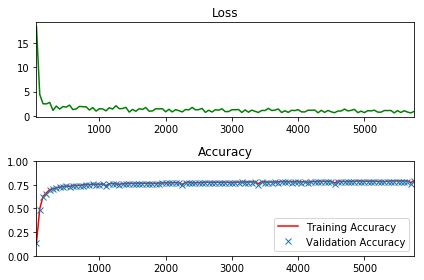

Validation accuracy at 0.7802666425704956


In [0]:
# Change if you have memory restrictions
batch_size = 128

# TODO: Find the best parameters for each configuration
epochs = 5
learning_rate = 0.2



### DON'T MODIFY ANYTHING BELOW ###
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)    

# The accuracy measured against the validation set
validation_accuracy = 0.0

# Measurements use for graphing loss and accuracy
log_batch_step = 50
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

with tf.Session() as session:
    session.run(init)
    batch_count = int(math.ceil(len(train_features)/batch_size))

    for epoch_i in range(epochs):
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]

            # Run optimizer and get loss
            _, l = session.run(
                [optimizer, loss],
                feed_dict={features: batch_features, labels: batch_labels})

            # Log every 50 batches
            if not batch_i % log_batch_step:
                # Calculate Training and Validation accuracy
                training_accuracy = session.run(accuracy, feed_dict=train_feed_dict)
                validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)

                # Log batches
                previous_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_batch)
                loss_batch.append(l)
                train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(validation_accuracy)

        # Check accuracy against Validation data
        validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)

loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'x', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

print('Validation accuracy at {}'.format(validation_accuracy))

## Test
You're going to test your model against your hold out dataset/testing data.  This will give you a good indicator of how well the model will do in the real world.  You should have a test accuracy of at least 80%.

In [0]:
### DON'T MODIFY ANYTHING BELOW ###
# The accuracy measured against the test set
test_accuracy = 0.0

with tf.Session() as session:
    
    session.run(init)
    batch_count = int(math.ceil(len(train_features)/batch_size))

    for epoch_i in range(epochs):
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]

            # Run optimizer
            _ = session.run(optimizer, feed_dict={features: batch_features, labels: batch_labels})

        # Check accuracy against Test data
        test_accuracy = session.run(accuracy, feed_dict=test_feed_dict)


assert test_accuracy >= 0.80, 'Test accuracy at {}, should be equal to or greater than 0.80'.format(test_accuracy)
print('Nice Job! Test Accuracy is {}'.format(test_accuracy))

Epoch  5/5: 100%|██████████| 1114/1114 [00:01<00:00, 805.41batches/s]

Nice Job! Test Accuracy is 0.8391000032424927


# Multiple layers
Good job!  You built a one layer TensorFlow network!  However, you might want to build more than one layer.  This is deep learning after all!  In the next section, you will start to satisfy your need for more layers.

# Quiz - TensorFlow ReLUs



In [0]:
import tensorflow as tf

output = None
hidden_layer_weights = [
    [0.1, 0.2, 0.4],
    [0.4, 0.6, 0.6],
    [0.5, 0.9, 0.1],
    [0.8, 0.2, 0.8]]
out_weights = [
    [0.1, 0.6],
    [0.2, 0.1],
    [0.7, 0.9]]

# Weights and biases
weights = [
    tf.Variable(hidden_layer_weights),
    tf.Variable(out_weights)]
biases = [
    tf.Variable(tf.zeros(3)),
    tf.Variable(tf.zeros(2))]

# Input
features = tf.Variable([[1.0, 2.0, 3.0, 4.0], [-1.0, -2.0, -3.0, -4.0], [11.0, 12.0, 13.0, 14.0]])

# TODO: Create Model
hidden_layer = tf.nn.relu(tf.add(tf.matmul(features, weights[0]), biases[0]))
logits = tf.add(tf.matmul(hidden_output, weights[1]), biases[1])

# TODO: Print session results
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(logits))

[[ 5.1099997  8.44     ]
 [ 0.         0.       ]
 [24.010002  38.24     ]]


# Deep Neural Network in TensorFlow

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True, reshape=False)

import tensorflow as tf

# Parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 128  # Decrease batch size if you don't have enough memory
display_step = 1

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

n_hidden_layer = 256 # layer number of features

weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}

biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# tf Graph input
x = tf.placeholder(tf.float32, [None, 28,28, 1])
y = tf.placeholder(tf.float32, [None, n_classes])

x_flat = tf.reshape(x, [-1, n_input])

# Hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)
# Output layer with linear activation
logits = tf.add(tf.matmul(layer_1, weights['out']), biases['out'])

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/batch_size)
        
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op(backprop) and cost op(to get loss value)
            sess.run(optimizer, feed_dict={x:batch_x, y:batch_y})

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./t10k-labels-idx1-ubyte.gz


#  Save and Restore TensorFlow Models

Training a model can take hours. But once you close your TensorFlow session, you lose all the trained weights and biases. If you were to reuse the model in the future, you would have to train it all over again!

Fortunately, TensorFlow gives you the ability to save your progress using a class called tf.train.Saver. This class provides the functionality to save any tf.Variable to your file system

##  Saving Variables

Let's start with a simple example of saving weights and bias Tensors. For the first example you'll just save two variables. Later examples will save all the weights in a practical model.

In [0]:
import tensorflow as tf

# The file path to save the data
save_file = './model.ckpt'

# Two Tensor Variables: weights and bias
weights = tf.Variable(tf.truncated_normal([2,3]))
bias = tf.Variable(tf.truncated_normal([3]))

# Class used to save and/or restore Tensor Variables
saver = tf.train.Saver()

with tf.Session() as sess:
    # Initialize all the Variables
    sess.run(tf.global_variables_initializer())
    # Show the value of weights and bias
    print('Weights:')
    print(sess.run(weights))
    print('Bias:')
    print(sess.run(bias))
    
    # save the model
    saver.save(sess, save_file)
    

Weights:
[[ 0.53742594 -0.12322772 -0.16663451]
 [-0.90039957  0.97000945  0.9874395 ]]
Bias:
[-0.77557915 -0.26914498 -0.08074012]


## Loading Variables

Now that the Tensor Variables are saved, let's load them back into a new model.

In [0]:
# Remove the previous weights and bias
tf.reset_default_graph()

# Two Variables: weights and bias
weights = tf.Variable(tf.truncated_normal([2,3]))
bias = tf.Variable(tf.truncated_normal([3]))

# Class used to save and/or restore Tensor Variables
saver = tf.train.Saver()

with tf.Session() as sess:
    # Load the weights and bias
    saver.restore(sess, save_file)
    
    # Show the value of weights and bias
    print('Weights:')
    print(sess.run(weights))
    print('Bias:')
    print(sess.run(bias))

W0714 15:38:02.490671 140054717048704 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Weights:
[[ 0.53742594 -0.12322772 -0.16663451]
 [-0.90039957  0.97000945  0.9874395 ]]
Bias:
[-0.77557915 -0.26914498 -0.08074012]


## Save a Trained Model

In [0]:
# Remove previous Tensors and Operations
tf.reset_default_graph()

from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

learning_rate = 0.001
n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('.', one_hot=True)

# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits - xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

import math
save_file = './train_model.ckpt'
batch_size = 128
n_epochs = 100

saver = tf.train.Saver()

# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(n_epochs):
        
        total_batch = math.ceil(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_features, batch_labels = mnist.train.next_batch(batch_size)
            sess.run(
                optimizer,
                feed_dict={features: batch_features, labels: batch_labels})
            
        # Print status for every 10 epochs
        if epoch % 10:
            valid_accuracy = sess.run(
                accuracy,
                feed_dict={
                    features: mnist.validation.images,
                    labels: mnist.validation.labels})
            print('Epoch {:<3} - Validation Accuracy: {}'.format(
                epoch,
                valid_accuracy))
    # Save the model
    saver.save(sess, save_file)
    print('Trained Model Saved')
            

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


W0714 15:50:53.756414 140054717048704 deprecation.py:323] From <ipython-input-6-42114beaade6>:25: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Epoch 1   - Validation Accuracy: 0.07999999821186066
Epoch 2   - Validation Accuracy: 0.09300000220537186
Epoch 3   - Validation Accuracy: 0.10819999873638153
Epoch 4   - Validation Accuracy: 0.12800000607967377
Epoch 5   - Validation Accuracy: 0.15240000188350677
Epoch 6   - Validation Accuracy: 0.1728000044822693
Epoch 7   - Validation Accuracy: 0.19499999284744263
Epoch 8   - Validation Accuracy: 0.21660000085830688
Epoch 9   - Validation Accuracy: 0.23739999532699585
Epoch 11  - Validation Accuracy: 0.27219998836517334
Epoch 12  - Validation Accuracy: 0.2856000065803528
Epoch 13  - Validation Accuracy: 0.3001999855041504
Epoch 14  - Validation Accuracy: 0.3156000077724457
Epoch 15  - Validation Accuracy: 0.329800009727478
Epoch 16  - Validation Accuracy: 0.34360000491142273
Epoch 17  - Validation Accuracy: 0.3580000102519989
Epoch 18  - Validation Accuracy: 0.37459999322891235
Epoch 19  - Validation Accuracy: 0.38499999046325684
Epoch 21  - Validation Accuracy: 0.41100001335144043


## Load a Trained Model

In [0]:
saver = tf.train.Saver()

# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, save_file)
    
    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: mnist.test.images, labels: mnist.test.labels})
    
print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.7335000038146973


# Finetuning

Sometimes you might want to adjust, or "finetune" a model that you have already trained and saved.

However, loading saved Variables directly into a modified model can generate errors. Let's go over how to avoid these problems.

#### Naming Error
TensorFlow uses a string identifier for Tensors and Operations called name. If a name is not given, TensorFlow will create one automatically. TensorFlow will give the first node the name <Type>, and then give the name <Type>_<number> for the subsequent nodes. Let's see how this can affect loading a model with a different order of weights and bias:

In [2]:
import tensorflow as tf

# Remove the previous weights and bias
tf.reset_default_graph()

save_file = 'model.ckpt'

# Two Tensor Variables: weights and bias
weights = tf.Variable(tf.truncated_normal([2,3]))
bias = tf.Variable(tf.truncated_normal([3]))

saver = tf.train.Saver()

# Print the name of Weights and Bias
print(f'Save Weights: {weights.name}')
print(f'Save Bias: {bias.name}')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.save(sess, save_file)
    
# Remove the previous weights and bias
tf.reset_default_graph()

# Two Variables: weights and bias
bias = tf.Variable(tf.truncated_normal([3]))
weights = tf.Variable(tf.truncated_normal([2, 3]))

saver = tf.train.Saver()

# Print the name of Weights and Bias
print('Load Weights: {}'.format(weights.name))
print('Load Bias: {}'.format(bias.name))

with tf.Session() as sess:
    saver.restore(sess, save_file)



Save Weights: Variable:0
Save Bias: Variable_1:0


W0715 14:15:44.530534 140298458589056 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Load Weights: Variable_1:0
Load Bias: Variable:0


InvalidArgumentError: ignored

…

InvalidArgumentError (see above for traceback): Assign requires shapes of both tensors to match.

…

You'll notice that the name properties for weights and bias are different than when you saved the model. This is why the code produces the "Assign requires shapes of both tensors to match" error. The code saver.restore(sess, save_file) is trying to load weight data into bias and bias data into weights.

Instead of letting TensorFlow set the name property, let's set it manually:

In [4]:
import tensorflow as tf

tf.reset_default_graph()

save_file = 'model.ckpt'

weights = tf.Variable(tf.truncated_normal([2,3]), name='weights_0')
bias = tf.Variable(tf.truncated_normal([3]), name='bias_0')

saver = tf.train.Saver()

print('Save Weights: {}'.format(weights.name))
print('Save Bias: {}'.format(bias.name))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.save(sess, save_file)
    
tf.reset_default_graph()

bias = tf.Variable(tf.truncated_normal([3]), name='bias_0')
weights = tf.Variable(tf.truncated_normal([2,3]), name='weights_0')

saver = tf.train.Saver()

print('Save Weights: {}'.format(weights.name))
print('Save Bias: {}'.format(bias.name))

with tf.Session() as sess:
    saver.restore(sess, save_file)

print('Loaded Weights and Bias successfully.')   

Save Weights: weights_0:0
Save Bias: bias_0:0
Save Weights: weights_0:0
Save Bias: bias_0:0
Loaded Weights and Bias successfully.


# Quiz - Tensorflow Dropout

- 正则化技巧防止过拟合
- 临时drop一些神经元

```
# probability to keep units

keep_prob = tf.placeholder(tf.float32) 

hidden_layer = tf.add(tf.matmul(features, weights[0]), biases[0])
hidden_layer = tf.nn.relu(hidden_layer)
hidden_layer = tf.nn.dropout(hidden_layer, keep_prob)

logits = tf.add(tf.matmul(hidden_layer, weights[1]), biases[1])
```

The code above illustrates how to apply dropout to a neural network.

The tf.nn.dropout() function takes in two parameters:

hidden_layer: the tensor to which you would like to apply dropout
keep_prob: the probability of keeping (i.e. not dropping) any given unit
keep_prob allows you to adjust the number of units to drop. In order to compensate for dropped units, tf.nn.dropout() multiplies all units that are kept (i.e. not dropped) by 1/keep_prob.

During training, a good starting value for keep_prob is 0.5.

During testing, use a keep_prob value of 1.0 to keep all units and maximize the power of the model.

keep_prob should be set to 1.0 when evaluating validation accuracy.

In [8]:
# Solution is available in the other "solution.py" tab
import tensorflow as tf

hidden_layer_weights = [
    [0.1, 0.2, 0.4],
    [0.4, 0.6, 0.6],
    [0.5, 0.9, 0.1],
    [0.8, 0.2, 0.8]]
out_weights = [
    [0.1, 0.6],
    [0.2, 0.1],
    [0.7, 0.9]]

# Weights and biases
weights = [
    tf.Variable(hidden_layer_weights),
    tf.Variable(out_weights)]
biases = [
    tf.Variable(tf.zeros(3)),
    tf.Variable(tf.zeros(2))]

# Input
features = tf.Variable([[0.0, 2.0, 3.0, 4.0], [0.1, 0.2, 0.3, 0.4], [11.0, 12.0, 13.0, 14.0]])

# TODO: Create Model with Dropout
keep_prop = tf.placeholder(tf.float32)

hidden_layer = tf.add(tf.matmul(features, weights[0]), biases[0])
hidden_layer = tf.nn.relu(hidden_layer)
hidden_layer = tf.nn.dropout(hidden_layer, keep_prop)
logits = tf.add(tf.matmul(hidden_layer, weights[1]), biases[1])
# TODO: Print logits from a session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(logits, feed_dict={keep_prop:0.5}))


[[ 2.9800003   7.5400004 ]
 [ 0.112       0.67200005]
 [ 4.7200003  28.320002  ]]
